<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/kuseborn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 52.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=2758890afadda9b0f49f404764d389965a3fffe43ea3c8f0a9a3cab10ca6ce35
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.getOrCreate()

In [8]:
schema = "total_bill float,	tip float,	sex string,	smoker string	,day string,	time string,	size int"

total_bill float,	tip float,	sex string,	smoker string	,day string,	time string,	size int

In [9]:
spdf=spark.read.csv("/content/tips.csv",header=True, schema=schema)

In [10]:
spdf.printSchema()

root
 |-- total_bill: float (nullable = true)
 |-- tip: float (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [16]:
spdf.show()

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|
|     18.43| 3.0|  Male|    No|Sun|Dinner|   4|
|     14.83|3.02|Female|    No|Sun|Dinner|   2|
|     21.58|3.92|  Male|    No|Sun|Dinner|   2|
|     10.33|1.67|Female|    No|Sun|Dinner|   3|
|     16.29|3.71|  Male|    No|Sun|Dinne

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
pddf=spdf.toPandas()

In [24]:
pddf

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.01,Female,No,Sun,Dinner,2
1,10.340000,1.66,Male,No,Sun,Dinner,3
2,21.010000,3.50,Male,No,Sun,Dinner,3
3,23.680000,3.31,Male,No,Sun,Dinner,2
4,24.590000,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.030001,5.92,Male,No,Sat,Dinner,3
240,27.180000,2.00,Female,Yes,Sat,Dinner,2
241,22.670000,2.00,Male,Yes,Sat,Dinner,2
242,17.820000,1.75,Male,No,Sat,Dinner,2


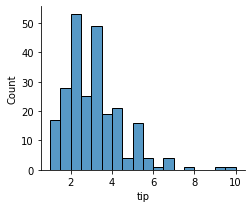

In [25]:
sns.displot(pddf.tip,height=3,aspect=1.2)

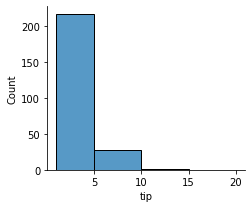

In [31]:
sns.displot(pddf.tip,bins=[1,5,10,15,20],height=3,aspect=1.2)

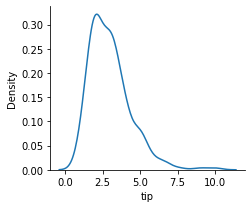

In [34]:
sns.displot(pddf.tip,kind='kde',height=3,aspect=1.2)

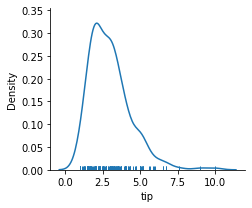

In [37]:
sns.displot(pddf.tip,kind='kde',rug=True,height=3,aspect=1.2)

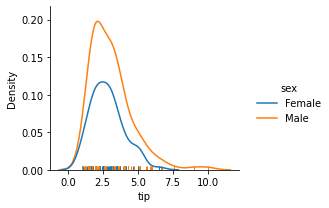

In [39]:
sns.displot(data=pddf, x='tip',hue='sex', kind='kde',rug=True,height=3,aspect=1.2)